# 0. Dataset Exploration

This notebook explores the dataset `Give me some credit` that can be obtained [here](https://www.kaggle.com/c/GiveMeSomeCredit).

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import itertools

from pprint import pprint
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.metrics import recall_score, precision_score, accuracy_score, make_scorer, confusion_matrix
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import fraudutils as futils
import warnings

warnings.filterwarnings(action='once')

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
cc_df = pd.read_csv('../../../data/raw/give-me-some-credit/cs-training.csv')
del cc_df['Unnamed: 0']
cc_df.info()
cc_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(7)
memory usage: 12.6 MB


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


## Fraud Frequency Graph

It's shown by the graph below how imbalanced our dataset is.

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

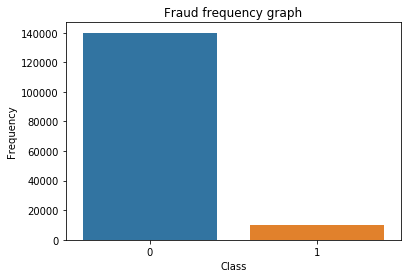

In [8]:
sns.barplot([0, 1], cc_df['SeriousDlqin2yrs'].value_counts())
plt.title("Fraud frequency graph")
plt.xlabel("Class")
plt.ylabel("Frequency")
cc_df['SeriousDlqin2yrs'].value_counts()

### Plotting anonymized data

Here we can check how distributed are each feature in our dataset between fraud and non-fraud examples.

/home/mikael/Dev/datascience-env/lib/python3.6/site-packages/matplotlib-2.2.2-py3.6-linux-x86_64.egg/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


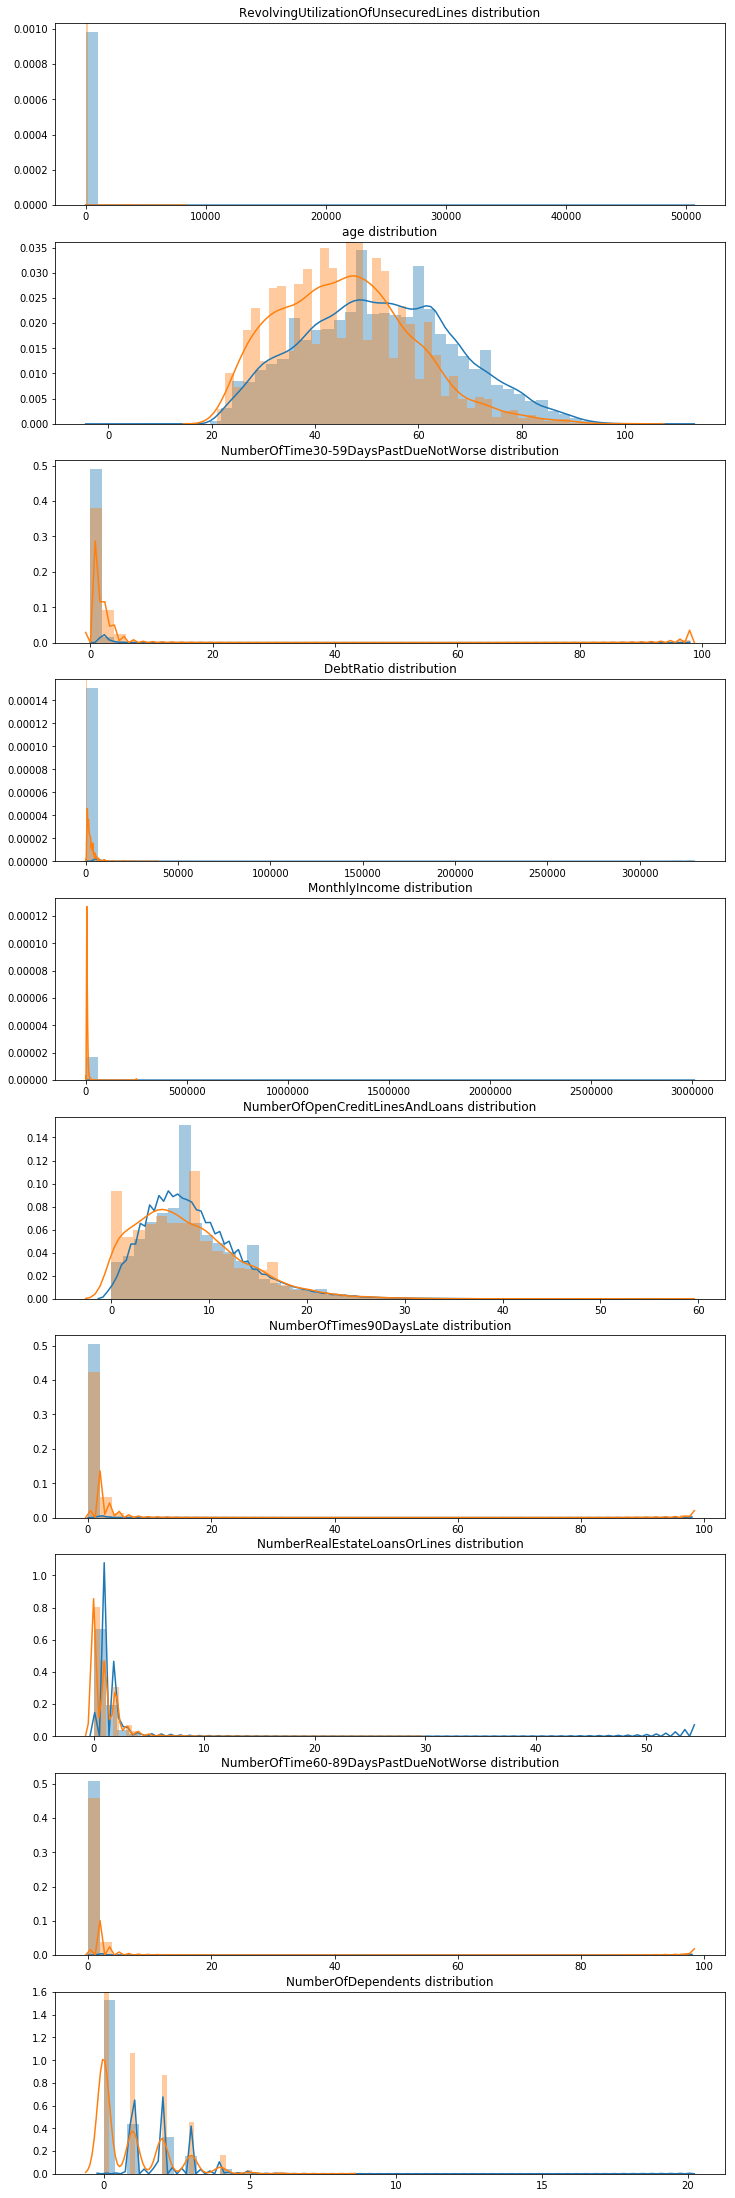

In [12]:
# Based on https://www.kaggle.com/currie32/predicting-fraud-with-tensorflow
anon_features = cc_df.iloc[:,1:].columns

cc_df = cc_df.fillna(0)

plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, feature in enumerate(anon_features):
    ax = plt.subplot(gs[i])
    sns.distplot(cc_df[feature][cc_df['SeriousDlqin2yrs'] == 0])
    sns.distplot(cc_df[feature][cc_df['SeriousDlqin2yrs'] == 1])
    plt.xlabel('')
    plt.title("{} distribution".format(feature))
plt.show()